In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
file = pd.read_csv("../data/raw/Avaliação_Mensal_Funcionários.csv")
file

,Cargo,Setor,Salário Bruto,Tipo de Contratação,Carga Horária por dia,Formação,Idade,NPS interno
0,Cientista de Dados,Dados,6000,CLT,8,Bacharel,24,9
1,Cientista de Dados,Dados,6500,CLT,8,Bacharel,26,"9,6"
2,Analista de Dados,Dados,5000,CLT,8,Bacharel,29,8
3,Analista de Dados,Dados,5800,CLT,8,Bacharel,36,9
4,Analista de Dados,Dados,7000,CLT,8,Bacharel,32,"9,4"
...,...,...,...,...,...,...,...,...
76,Estagiario de Engenharia de Software,Engenharia de Software,1800,Estágio,6,Bacharel,21,9
77,Estagiario de Engenharia de Software,Engenharia de Software,1800,Estágio,6,Bacharel,24,"9,3"
78,Estagiario adm,Adm-Fin,1000,Estágio,6,Bacharel,19,"9,8"
79,Estagiario adm,Adm-Fin,1000,Estágio,6,Bacharel,18,"8,9"


In [99]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cargo                  81 non-null     object
 1   Setor                  81 non-null     object
 2   Salário Bruto          81 non-null     int64 
 3   Tipo de Contratação    81 non-null     object
 4   Carga Horária por dia  81 non-null     int64 
 5   Formação               81 non-null     object
 6   Idade                  81 non-null     int64 
 7   NPS interno            81 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.2+ KB


In [100]:
file['NPS interno'] = file['NPS interno'].str.replace(",", ".").astype("float")

In [101]:
file.Setor = file.Setor.replace({"Engenheiro de Software" : "Engenharia de Software"})
file.Setor = file.Setor.replace({"Engenharia de Software" : "Eng. Software"})

C:\Users\gabri\AppData\Local\Temp\ipykernel_15272\2698752300.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  setores = file.groupby(["Setor"]).mean()["NPS interno"].index
C:\Users\gabri\AppData\Local\Temp\ipykernel_15272\2698752300.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nps_medio_por_setor = file.groupby(["Setor"]).mean()["NPS interno"].values


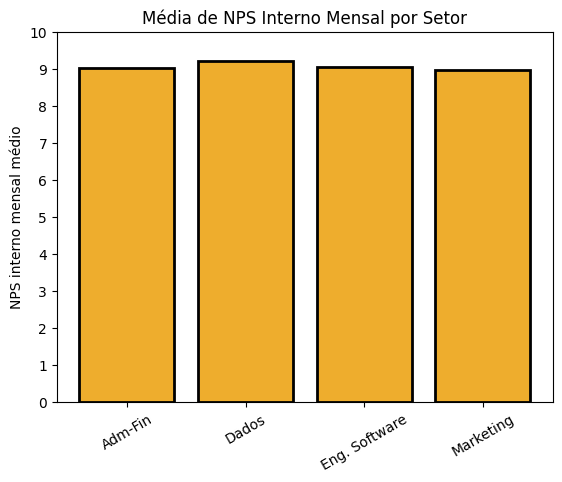

In [102]:
setores = file.groupby(["Setor"]).mean()["NPS interno"].index
nps_medio_por_setor = file.groupby(["Setor"]).mean()["NPS interno"].values

plt.bar(setores, nps_medio_por_setor,color='#eead2d', edgecolor='black', linewidth= 2 )
plt.ylabel("NPS interno mensal médio")
plt.xticks(rotation = 30)
plt.yticks(np.array(range(0, 11, 1)))
plt.title("Média de NPS Interno Mensal por Setor");

C:\Users\gabri\AppData\Local\Temp\ipykernel_15272\1190674046.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipo_contratacao = file.groupby(["Tipo de Contratação"]).mean()["NPS interno"].index
C:\Users\gabri\AppData\Local\Temp\ipykernel_15272\1190674046.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nps_medio_por_tipo_contratacao = file.groupby(["Tipo de Contratação"]).mean()["NPS interno"].values


Index(['CLT', 'Estágio', 'PJ'], dtype='object', name='Tipo de Contratação')


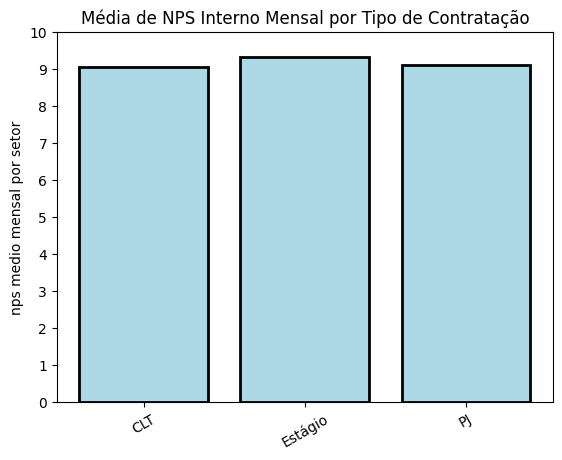

In [103]:
tipo_contratacao = file.groupby(["Tipo de Contratação"]).mean()["NPS interno"].index
nps_medio_por_tipo_contratacao = file.groupby(["Tipo de Contratação"]).mean()["NPS interno"].values
print(tipo_contratacao)

plt.bar(tipo_contratacao, nps_medio_por_tipo_contratacao, color='#add8e6', edgecolor='black', linewidth= 2)
plt.ylabel("nps medio mensal por setor")
plt.xticks(rotation = 30)
plt.yticks(np.array(range(0, 11, 1)))
plt.title("Média de NPS Interno Mensal por Tipo de Contratação");

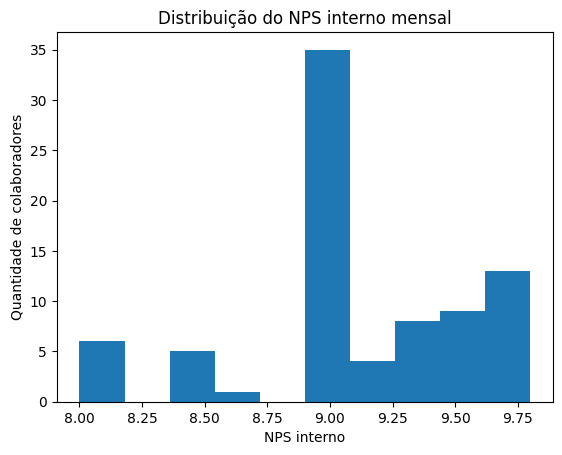

In [104]:
plt.hist(file["NPS interno"])
plt.title("Distribuição do NPS interno mensal")
plt.ylabel("Quantidade de colaboradores")
plt.xlabel("NPS interno");

C:\Users\gabri\AppData\Local\Temp\ipykernel_15272\886020646.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  idade = file.groupby(["Setor"]).mean()["Idade"].values


Text(0.5, 1.0, 'Idade média por setor')

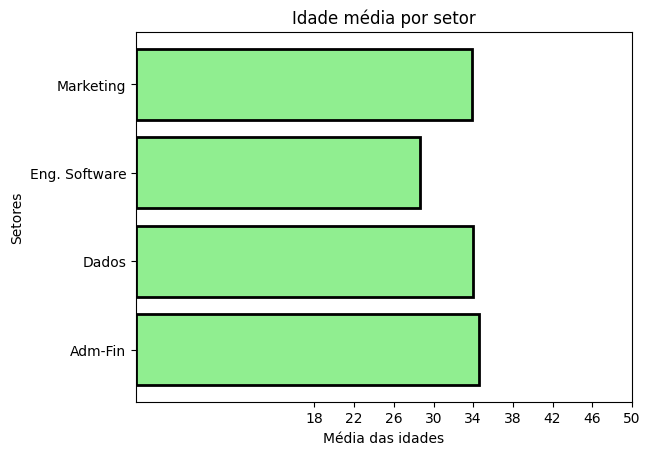

In [105]:
setor = file.groupby(["Setor"]).count().index
idade = file.groupby(["Setor"]).mean()["Idade"].values
plt.barh(setor, idade, color= "#90ee90", edgecolor='black', linewidth= 2)
plt.xlabel("Média das idades")
plt.xticks(np.array(range(18, 54, 4)))
plt.ylabel("Setores")
plt.title("Idade média por setor")


In [116]:

teste = [34.625, 34.0, 28.61904761904762, 33.88235294117647]
teste?

Type:        list
String form: [34.625, 34.0, 28.61904761904762, 33.88235294117647]
Length:      4
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

In [119]:
teste = file.groupby('Setor').mean(numeric_only=True)['Idade'].values
y = teste.tolist()
y?

Type:        list
String form: [34.625, 34.0, 28.61904761904762, 33.88235294117647]
Length:      4
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

C:\Users\gabri\AppData\Local\Temp\ipykernel_15272\4279205818.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  setor1 = file.groupby(["Setor"]).mean().index
C:\Users\gabri\AppData\Local\Temp\ipykernel_15272\4279205818.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  salarios = file.groupby(["Setor"]).mean()["Salário Bruto"].values


Text(0.5, 1.0, 'Media salarial dos setores')

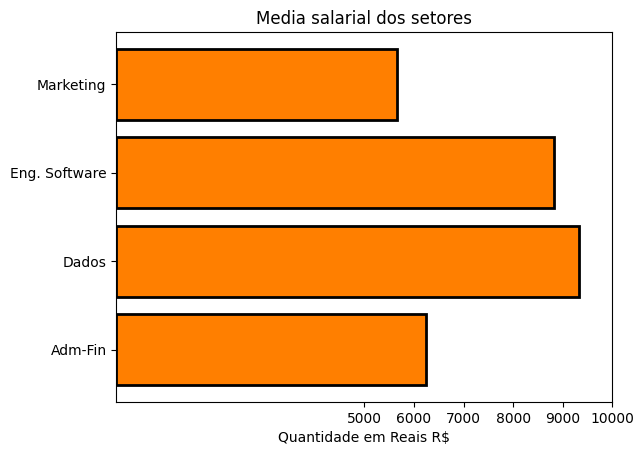

In [124]:
setor1 = file.groupby(["Setor"]).mean().index
salarios = file.groupby(["Setor"]).mean()["Salário Bruto"].values
plt.barh(setor1, salarios, color = "#ff7f00", edgecolor='black', linewidth= 2)
plt.xlabel("Quantidade em Reais R$")
plt.xticks(np.array(range(5000, 11000, 1000)));
plt.title("Media salarial dos setores")

In [127]:
labels = file.groupby(["Setor"]).mean().index
size = file.groupby(["Setor"]).count()["Cargo"]
total = np.sum(size)
explode = (0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(size, explode=explode, labels=labels, autopct= lambda p: '{:.0f}'.format(p*total/100) + ' ({:.1f})%'.format(p), shadow=True, radius=3.5, textprops= {'size':'8'}, colors=['orange', 'blue', 'purple', 'red', 'green'], startangle=180)
ax1.axis('equal')
plt.title("Porcentagem de Colaboradores por setor")
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_15272\2944963970.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  labels = file.groupby(["Setor"]).mean().index


Setor
Adm-Fin           8
Dados            35
Eng. Software    21
Marketing        17
Name: Cargo, dtype: int64

C:\Users\gabri\AppData\Local\Temp\ipykernel_15272\1246124745.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  contratos = file.groupby(["Tipo de Contratação"]).mean().index


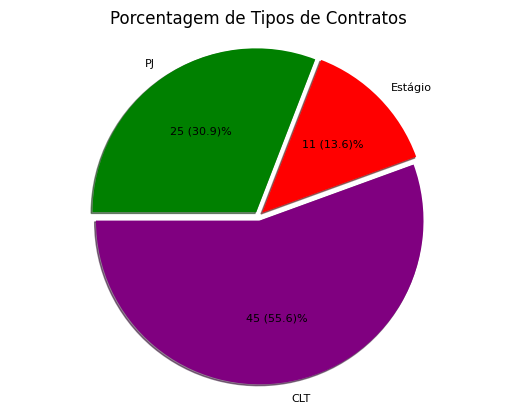

In [110]:
contratos = file.groupby(["Tipo de Contratação"]).mean().index
qtde_pessoal = file.groupby(["Tipo de Contratação"]).count()["Cargo"].values
total = np.sum(qtde_pessoal)
explode = (0.1, 0.1, 0.1)
fig2, ax2 = plt.subplots()
ax2.pie(qtde_pessoal, explode=explode, labels=contratos, autopct= lambda p: '{:.0f}'.format(p*total/100) + ' ({:.1f})%'.format(p), shadow=True, radius=3.5, textprops= {'size':'8'}, colors=['purple', 'red', 'green'], startangle=180)
ax2.axis('equal')
plt.title("Porcentagem de Tipos de Contratos")
plt.show()